# XGBoost Classifier for TELCO-Churn dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
!pip install xgboost
import xgboost as xgb

In [3]:
df = pd.read_csv('Telco-Churn.csv')
#df

In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Looking for mising data
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Check for the dtype of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Ahora queremos cambiar el tipo de dato a numerico
#df['TotalCharges'].unique()

#Pero dado que hay espacios en blanco no se puede aplicar el cambio, por lo que cambiamos esos valores en blanco a cero
df.loc[df['TotalCharges'] == ' ','TotalCharges'] = 0
#Y  ahora si cambiamos el tipo
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
#df.dtypes

In [10]:
#Cambiamos todos los espacios en blanco por underscore
df.replace(' ','_',regex=True, inplace=True)

In [11]:
X = df.drop(['Churn'],axis=1).copy()
y = df['Churn'].copy()

In [12]:
#Make a dummies columns for each categorical value, el ohe stands for one_hot_encoding
columns = ['gender','Partner','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Dependents']
X_ohe = pd.get_dummies(X,columns=columns)

In [13]:
X_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Dependents_No,Dependents_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
7040,0,11,29.60,346.45,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
7041,1,4,74.40,306.60,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0


In [14]:
y.replace(['No', 'Yes'],[0,1],inplace=True)

In [15]:
y.unique()

array([0, 1])

In [17]:
#Now the data must be splited, but once the number of people that leave are less than the ones that don't,  
#stratify must be used. 
X_train, X_test, y_train, y_test = train_test_split(X_ohe,y,random_state=0,stratify=y)

# Line Base Model - Now the Xgboost model

In [27]:
param_dist = {
    'objective':'binary:logistic',
    'n_estimators':100,
    'missing': None,
    'learning_rate': 0.5,
    'max_depth': 8,

}
xgb_classifier = xgb.XGBClassifier(**param_dist)
xgb_classifier.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train), (X_test, y_test)],
                  eval_metric='aucpr',
                  verbose=True
                  )

[0]	validation_0-aucpr:0.736774	validation_1-aucpr:0.615457
[1]	validation_0-aucpr:0.772709	validation_1-aucpr:0.619989
[2]	validation_0-aucpr:0.806891	validation_1-aucpr:0.61743
[3]	validation_0-aucpr:0.833987	validation_1-aucpr:0.623258
[4]	validation_0-aucpr:0.853877	validation_1-aucpr:0.624375
[5]	validation_0-aucpr:0.870745	validation_1-aucpr:0.626985
[6]	validation_0-aucpr:0.879792	validation_1-aucpr:0.627391
[7]	validation_0-aucpr:0.887704	validation_1-aucpr:0.634478
[8]	validation_0-aucpr:0.896915	validation_1-aucpr:0.634667
[9]	validation_0-aucpr:0.90278	validation_1-aucpr:0.636064
[10]	validation_0-aucpr:0.90478	validation_1-aucpr:0.636567
[11]	validation_0-aucpr:0.913293	validation_1-aucpr:0.641074
[12]	validation_0-aucpr:0.922292	validation_1-aucpr:0.63637
[13]	validation_0-aucpr:0.924897	validation_1-aucpr:0.63616
[14]	validation_0-aucpr:0.925651	validation_1-aucpr:0.636265
[15]	validation_0-aucpr:0.926918	validation_1-aucpr:0.635607
[16]	validation_0-aucpr:0.929237	valida

XGBClassifier(learning_rate=0.5, max_depth=8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


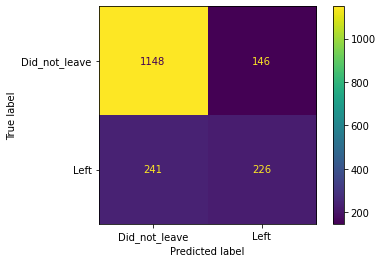

In [28]:
plot_confusion_matrix(xgb_classifier,
                      X_test,
                      y_test,
                      display_labels=['Did_not_leave','Left']
                      )

## Now i used GridSearchCV for tunning all the parameters

In [23]:
param_grid = {
    'max_depth': [3,5],
    'learning_rate': [0.1,0.3,0.5],
    'scale_post_weight': [1,3,5],
    'n_estimators': [100],
    'gamma': [0,0.1,0.25],
    'reg_lambda': [0,1.0]
}

params = GridSearchCV(
    xgb_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=1
)
params.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=XGBClassifier(learning_rate=0.3),
             param_grid={'gamma': [0, 0.1, 0.25],
                         'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [3, 5],
                         'n_estimators': [100], 'reg_lambda': [0, 1.0],
                         'scale_post_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [24]:
params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_lambda': 0,
 'scale_post_weight': 1}

In [25]:
param_dist_opt = {
    'objective':'binary:logistic',
    'gamma': 0.25,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'reg_lambda': 0,
    'scale_post_weight': 1
}
opt_xgb_classifier = xgb.XGBClassifier(**param_dist)
opt_xgb_classifier.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train), (X_test, y_test)],
                  eval_metric='aucpr',
                  verbose=True
                  )

[0]	validation_0-aucpr:0.591141	validation_1-aucpr:0.586069
[1]	validation_0-aucpr:0.62944	validation_1-aucpr:0.621575
[2]	validation_0-aucpr:0.644129	validation_1-aucpr:0.62431
[3]	validation_0-aucpr:0.646403	validation_1-aucpr:0.626112
[4]	validation_0-aucpr:0.657982	validation_1-aucpr:0.629227
[5]	validation_0-aucpr:0.674482	validation_1-aucpr:0.638981
[6]	validation_0-aucpr:0.675982	validation_1-aucpr:0.638402
[7]	validation_0-aucpr:0.683723	validation_1-aucpr:0.64173
[8]	validation_0-aucpr:0.684965	validation_1-aucpr:0.639495
[9]	validation_0-aucpr:0.689586	validation_1-aucpr:0.640083
[10]	validation_0-aucpr:0.69197	validation_1-aucpr:0.645474
[11]	validation_0-aucpr:0.696157	validation_1-aucpr:0.650147
[12]	validation_0-aucpr:0.698646	validation_1-aucpr:0.649555
[13]	validation_0-aucpr:0.701363	validation_1-aucpr:0.648352
[14]	validation_0-aucpr:0.704071	validation_1-aucpr:0.649964
[15]	validation_0-aucpr:0.705835	validation_1-aucpr:0.649497
[16]	validation_0-aucpr:0.707099	valid

XGBClassifier(learning_rate=0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


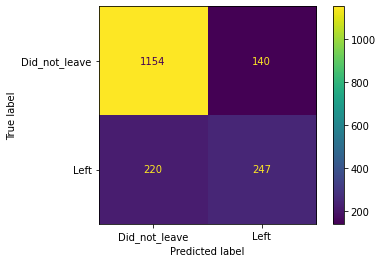

In [26]:
plot_confusion_matrix(xgb_classifier,
                      X_test,
                      y_test,
                      display_labels=['Did_not_leave','Left']
                      )